    数据结构

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pandas 的数据是字典形式
#series

s = pd.Series([1,2,3,np.nan,44])
print(s)

0     1.0
1     2.0
2     3.0
3     NaN
4    44.0
dtype: float64


In [3]:
#dataframe
dates = pd.date_range('20240223',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])
print(df)
print('\n')
print(df['b'])

                   a         b         c         d
2024-02-23  0.364598  0.527236  0.831475  1.360784
2024-02-24  1.451821  1.276459  1.215731 -0.128058
2024-02-25  0.815248 -0.881076  1.059763  0.577388
2024-02-26 -1.725353  0.973057  0.866535  0.799354
2024-02-27 -1.326865 -0.896823 -0.278206  0.160683
2024-02-28  1.001823  1.150253 -1.843766 -0.823272


2024-02-23    0.527236
2024-02-24    1.276459
2024-02-25   -0.881076
2024-02-26    0.973057
2024-02-27   -0.896823
2024-02-28    1.150253
Freq: D, Name: b, dtype: float64


In [4]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)))
print(df1)

df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20240228'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})

#df的属性
print(df2.index)
print(df2.columns)
print(df2.values)
df2.describe()
df2.T

print(df2.sort_index(axis=1, ascending=False))#对index排序
print(df2.sort_values(by='B'))


   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
Index([0, 1, 2, 3], dtype='int64')
Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')
[[1.0 Timestamp('2024-02-28 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2024-02-28 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2024-02-28 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2024-02-28 00:00:00') 1.0 3 'train' 'foo']]
     F      E  D    C          B    A
0  foo   test  3  1.0 2024-02-28  1.0
1  foo  train  3  1.0 2024-02-28  1.0
2  foo   test  3  1.0 2024-02-28  1.0
3  foo  train  3  1.0 2024-02-28  1.0
     A          B    C  D      E    F
0  1.0 2024-02-28  1.0  3   test  foo
1  1.0 2024-02-28  1.0  3  train  foo
2  1.0 2024-02-28  1.0  3   test  foo
3  1.0 2024-02-28  1.0  3  train  foo


选择数据



In [5]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
print(df)
print('\n')

#简单选取
print(df['A'])
print(df.A)
print('\n')
#多行、多列选取
print(df[0:3])
print(df['20130102':'20130104'])
print('\n')


             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32
2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32


            A  B   C   D
2013-01-01  0  1   2   3
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11
             A   B   C   D
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15




In [6]:
#根据标签loc
print(df.loc['20130102'])
print(df.loc[:,['A','B']]) 
print(df.loc['20130102',['A','B']])

A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int32
             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21
A    4
B    5
Name: 2013-01-02 00:00:00, dtype: int32


In [7]:
#根据序列 iloc
print(df.iloc[3,1])
print(df.iloc[3:5,1:3])
print(df.iloc[[1,3,5],1:3])

13
             B   C
2013-01-04  13  14
2013-01-05  17  18
             B   C
2013-01-02   5   6
2013-01-04  13  14
2013-01-06  21  22


#通过判断的筛选
print(df[df.A>8])

    创建数据

In [8]:

#根据位置设置 loc 和 iloc
df.iloc[2,2] = 1111
df.loc['20130101','B'] = 2222
print(df)


             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     9  1111  11
2013-01-04  12    13    14  15
2013-01-05  16    17    18  19
2013-01-06  20    21    22  23


In [9]:

#根据条件设置
df.D[df.B>4] = 0
print(df)

#按行或列设置
df['F'] = np.nan
print(df)

             A     B     C  D
2013-01-01   0  2222     2  0
2013-01-02   4     5     6  0
2013-01-03   8     9  1111  0
2013-01-04  12    13    14  0
2013-01-05  16    17    18  0
2013-01-06  20    21    22  0
             A     B     C  D   F
2013-01-01   0  2222     2  0 NaN
2013-01-02   4     5     6  0 NaN
2013-01-03   8     9  1111  0 NaN
2013-01-04  12    13    14  0 NaN
2013-01-05  16    17    18  0 NaN
2013-01-06  20    21    22  0 NaN


处理丢失数据

In [10]:
#处理NaN数据
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
print(df)

#pd.dropna()  如果想直接去掉有 NaN 的行或列, 可以使用 dropna
df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    ) 

#pd.fillna()  如果是将 NaN 的值用其他值代替, 比如代替成 0:
df.fillna(value=0)

df.isnull() #判断是否有缺失数据 NaN, 为 True 表示缺失数据



             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


,A,B,C,D
2013-01-01,False,True,False,False
2013-01-02,False,False,True,False
2013-01-03,False,False,False,False
2013-01-04,False,False,False,False
2013-01-05,False,False,False,False
2013-01-06,False,False,False,False


数据导入导出

In [11]:
#pandas可以读取与存取的资料格式有很多种，像csv、excel、json、html与pickle等…

data = pd.read_csv(r'C:\Users\92059\OneDrive\桌面\student.csv')
print(data)

data = pd.read_csv('student.csv')
print(data)

#存储为pickle
data.to_pickle('student.pickle')

    Student ID  name   age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      Q   23    Male
13        1113      W   21  Female
    Student ID  name   age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      

合并 concat

In [12]:
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])

#concat纵向合并
res = pd.concat([df1, df2, df3], axis=0)

#打印结果
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [13]:
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
print(res)#重新设置index

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [14]:
#join参数
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])

#纵向"外"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='outer')
print(res)

#承上一个例子
#纵向"内"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='inner')
#打印结果
print(res)
#重置index并打印结果
res = pd.concat([df1, df2], axis=0, join='inner', ignore_index=True)
print(res)

#append
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])

#将df2合并到df1的下面，以及重置index，并打印出结果
res = df1._append(df2, ignore_index=True)
print(res)

#合并多个df，将df2与df3合并至df1的下面，以及重置index，并打印出结果
res = df1._append([df2, df3], ignore_index=True)
print(res)

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0
     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0


合并merge


In [15]:
#定义资料集并打印出
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
print(right)
#依据key column合并，并打印出
res = pd.merge(left, right, on='key')
print(res)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [16]:
#依据两组key合并

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})

print(left)

print(right)

#依据key1与key2 columns进行合并，并打印出四种结果['left', 'right', 'outer', 'inner']
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res)

res = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res)

res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)

res = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3
  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2
  key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3
  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN
  key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3


#依据index合并
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

print(left)
print(right)

#依据左右资料集的index进行合并，how='outer',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)

#依据左右资料集的index进行合并，how='inner',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)


plot绘图

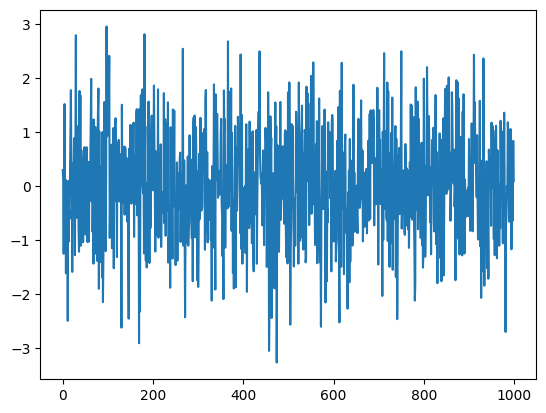

In [17]:
##熟悉 matplotlib 的朋友知道如果需要plot一个数据，
# 我们可以使用 plt.plot(x=, y=)，把x,y的数据作为参数存进去，
# 但是data本来就是一个数据，所以我们可以直接plot

# 随机生成1000个数据

data = pd.Series(np.random.randn(1000),index=np.arange(1000))
 
# 为了方便观看效果, 我们累加这个数据
data.cumsum()

# pandas 数据可以直接观看其可视化形式
data.plot()

plt.show()

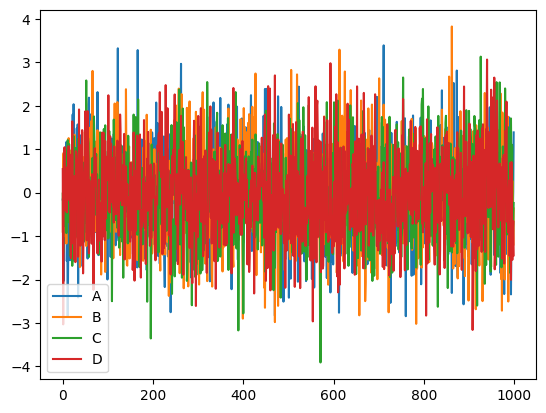

In [18]:
data = pd.DataFrame(
    np.random.randn(1000,4),
    index=np.arange(1000),
    columns=list("ABCD")
    )
data.cumsum()
data.plot()
plt.show()

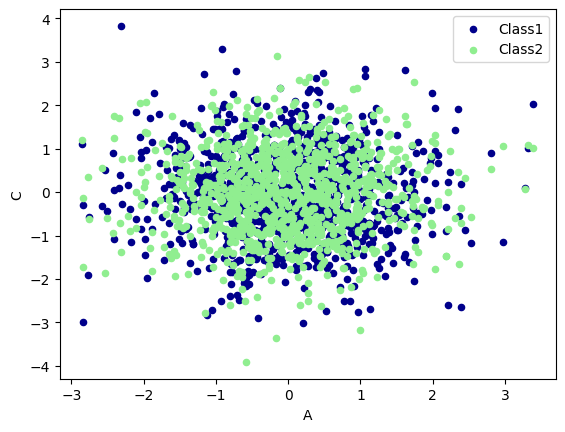

In [19]:
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')

# 将之下这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()